In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split,cross_val_score,KFold
import matplotlib.pyplot as plt
import os 

chose_data = 'full_data.csv'
#chose_data = 'significant_data_05.csv'


In [36]:
data = pd.read_csv(chose_data)
total_data =  len(data.index)
print('the number of sample:',total_data)

the number of sample: 180495


In [37]:
# split train/test set into 0.75:0.25 (3:1)
#train_set = data.iloc[:int(total_data*0.75)]
#test_set = data.iloc[int(total_data*0.75):]

In [38]:
#train_y, train_X = train_set['Late_delivery_risk'], train_set.drop(columns=['Late_delivery_risk'])
#test_y, test_X = test_set['Late_delivery_risk'], test_set.drop(columns=['Late_delivery_risk'])

In [43]:
x_train,x_test,y_train,y_test = train_test_split(data.drop('Late_delivery_risk', axis = 1).values,data['Late_delivery_risk'].values,test_size = 0.5)

In [44]:
rf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.01, n_estimators=100,
                       verbose=0, warm_start=True)
model = rf.fit(x_train, y_train)

In [45]:
rf.feature_importances_

array([0.04907731, 0.00227717, 0.00246628, 0.00821188, 0.00675934,
       0.0021299 , 0.00173761, 0.00155429, 0.00202467, 0.00157774,
       0.00109319, 0.00127932, 0.00235458, 0.00219944, 0.00210022,
       0.03148893, 0.02724391, 0.00090602, 0.82431387, 0.02920435])

In [46]:
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

[[33461  7405]
 [20529 28853]]
              precision    recall  f1-score   support

           0       0.62      0.82      0.71     40866
           1       0.80      0.58      0.67     49382

    accuracy                           0.69     90248
   macro avg       0.71      0.70      0.69     90248
weighted avg       0.72      0.69      0.69     90248

0.7015398724456076


C:\Users\THINKPAD\AppData\Local\Temp\ipykernel_22044\1819871318.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cm = cm/cm.astype(np.float).sum(axis=1)


<Figure size 432x288 with 0 Axes>

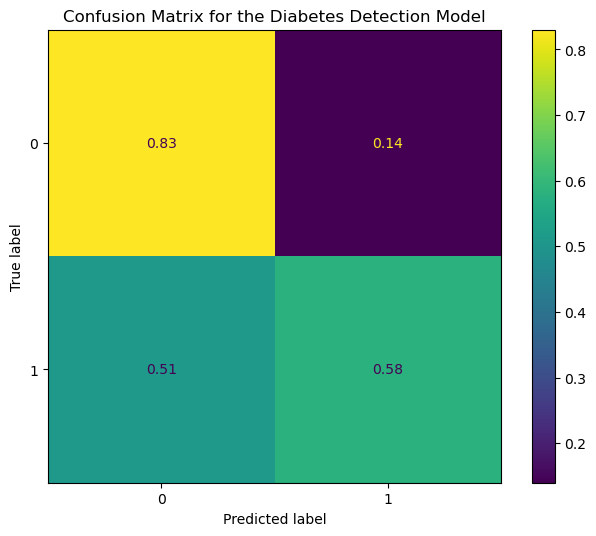

In [106]:
import numpy as np
#cm = np.asarray(cm)
cm = cm/cm.astype(np.float).sum(axis=1)
for i in range(len(cm)):
    for j in range(len(cm)):
        cm[i][j] = round(cm[i][j],2)
        
plt.figure()
fig, ax = plt.subplots(figsize=(8,6), dpi=100)

# initialize using the raw 2D confusion matrix 
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(cm, display_labels=model.classes_)

# set the plot title using the axes object
ax.set(title='Confusion Matrix for the Diabetes Detection Model')

# show the plot. 
# Pass the parameter ax to show customizations (ex. title) 
display.plot(ax=ax)
fig.savefig('t.png')


In [82]:

data.keys()

Index(['Unnamed: 0', 'Latitude', 'Longitude', 'Order Item Discount Rate',
       'Order Item Profit Ratio', 'Sales', 'Late_delivery_risk',
       'order_weekday', 'shipping_weekday', 'market_int', 'shipping_mode_int',
       'type'],
      dtype='object')

In [83]:
rf.feature_importances_

array([0.05879618, 0.05357343, 0.04696136, 0.0233659 , 0.03215321,
       0.02498032, 0.25158258, 0.24340101, 0.01353119, 0.23826968,
       0.01338513])

C:\Users\THINKPAD\AppData\Local\Temp\ipykernel_22044\3449923832.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cm = cm/cm.astype(np.float).sum(axis=1)


In [7]:
from sklearn import preprocessing

x_train  = preprocessing.normalize(x_train)
x_test  = preprocessing.normalize(x_test)

In [8]:
xgb = XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, monotone_constraints=None,
              n_estimators=140, n_jobs=4, nthread=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=27, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=27, subsample=0.8,
              tree_method=None, validate_parameters=False, verbosity=None)
model = xgb.fit(x_train,y_train)

In [9]:
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

[[17070  3404]
 [10637 14013]]
              precision    recall  f1-score   support

           0       0.62      0.83      0.71     20474
           1       0.80      0.57      0.67     24650

    accuracy                           0.69     45124
   macro avg       0.71      0.70      0.69     45124
weighted avg       0.72      0.69      0.69     45124

0.7011095277223911


In [10]:
xgb.feature_importances_

array([0.02478503, 0.09210464, 0.08715743, 0.02296281, 0.02559703,
       0.02444382, 0.03085499, 0.0445023 , 0.5617424 , 0.08584961],
      dtype=float32)

In [130]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from keras.optimizers import Adam
# Tạo mạng nơ ron
model = Sequential()
model.add(Dense(16, input_dim=19, activation='relu'))
model.add(Dense(16, input_dim=16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
optimizer = Adam(learning_rate=0.01)
# Biên dịch mô hình
model.compile(loss='binary_crossentropy',  optimizer=optimizer, metrics=['accuracy'])

# Huấn luyện và đánh giá mô hình
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=64)


Epoch 1/10
2116/2116 [==============================] - 11s 5ms/step - loss: 0.6888 - accuracy: 0.5479 - val_loss: 0.6884 - val_accuracy: 0.5489
Epoch 2/10
2116/2116 [==============================] - 12s 6ms/step - loss: 0.6886 - accuracy: 0.5482 - val_loss: 0.6884 - val_accuracy: 0.5491
Epoch 3/10
2116/2116 [==============================] - 10s 5ms/step - loss: 0.6885 - accuracy: 0.5486 - val_loss: 0.6882 - val_accuracy: 0.5493
Epoch 4/10
2116/2116 [==============================] - 11s 5ms/step - loss: 0.6885 - accuracy: 0.5485 - val_loss: 0.6886 - val_accuracy: 0.5497
Epoch 5/10
2116/2116 [==============================] - ETA: 0s - loss: 0.6883 - accuracy: 0.5495

KeyboardInterrupt: 

In [ ]:
from sklearn import svm
model = svm.SVC(kernel='linear')

# Huấn luyện mô hình
model.fit(x_train, y_train)

# Dự đoán nhãn cho dữ liệu test
predictions = model.predict(x_test)

print("Dự đoán nhãn cho dữ liệu test:")
for i in range(len(X_test)):
    print(X_test[i], "-->", predictions[i])